SETUP

In [1]:
import sys
import numpy as ns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os



GETTING DATA

In [2]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Assignment_3"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://github.com/aiforsec/RIT-DSCI-633-FDS/blob/f126a5a1c0ecd0c1439378c58ce789865f06bf33/Assignments/titanic.zip"

In [4]:
TITANIC_PATH = os.path.join("datasets", "titanic")
TITANIC_URL = DOWNLOAD_ROOT + "datasets/titanic/titanic.tgz"

def fetch_titanic_data(titanic_url=TITANIC_URL, titanic_path=TITANIC_PATH):
    if not os.path.isdir(titanic_path):
        os.makedirs(titanic_path)
    tgz_path = os.path.join(titanic_path, "titanic.tgz")
    urllib.request.urlretrieve(titanic_url, tgz_path)
    titanic_tgz = tarfile.open(tgz_path)
    titanic_tgz.extractall(path=titanic_path)
    titanic_tgz.close()
    
    fetch_titanic_data

In [5]:
train = pd.read_csv('downloads/titanic/train.csv')
train
test = pd.read_csv("downloads/titanic/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
train.shape

(891, 12)

DATA MANIPULATION AND ANALYSIS

In [7]:
train.info()
#details of df 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#checking for na value
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Column PassengerId, Name, Ticket is not relevant for model bulding. So we are droping them and
*cabin * column have 687 null values so we are droping that also.

In [9]:
train.drop(["PassengerId", "Name", "Ticket",'Cabin'],axis=1,inplace=True)
test.drop(["PassengerId", "Name", "Ticket",'Cabin'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
#We impute the missing data for column 'Age' using median imputation as the data is continuous in nature. While for 'Embarked'
train['Age'] = train['Age'].fillna(train['Age'].median()) 
test['Age'] = test['Age'].fillna(test['Age'].median()) 
test['Fare'] = test['Fare'].fillna(test['Fare'].median()) 
train['Embarked'] = train['Embarked'].fillna("Unknown")
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
#We Have two categorical columns ('Sex' and ' Embarked'). We will use LabelEncoder and change the same to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#train
train['Sex']      = le.fit_transform(train['Sex'])
train['Embarked']      = le.fit_transform(train['Embarked'])

#test
test['Sex']      = le.fit_transform(test['Sex'])
test['Embarked']      = le.fit_transform(test['Embarked'])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [13]:
EDA = {"column ": train.columns,
      "mean": train.mean(),
      "median":train.median(),
      "mode":train.mode(),
      "standard deviation": train.std(),
      "variance":train.var(),
      "skewness":train.skew(),
      "kurtosis":train.kurt()}
print(EDA)

{'column ': Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object'), 'mean': Survived     0.383838
Pclass       2.308642
Sex          0.647587
Age         29.361582
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Embarked     1.538721
dtype: float64, 'median': Survived     0.0000
Pclass       3.0000
Sex          1.0000
Age         28.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
Embarked     2.0000
dtype: float64, 'mode':    Survived  Pclass  Sex   Age  SibSp  Parch  Fare  Embarked
0         0       3    1  28.0      0      0  8.05         2, 'standard deviation': Survived     0.486592
Pclass       0.836071
Sex          0.477990
Age         13.019697
SibSp        1.102743
Parch        0.806057
Fare        49.693429
Embarked     0.794231
dtype: float64, 'variance': Survived       0.236772
Pclass         0.699015
Sex            0.228475
Age          169.512498
SibSp          1.216043
Parch        

In [14]:
#for normalization we are using MinMaxScale from the sklear.preprocessing

#Survived,Pclass,Sex,SibSp,Parch,Embarked, these are discret data 
#so we will Create dummy variables on categorcal columns

#for Age, Fare we will go with Scaling

from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler() #assigning scaling for MinMaxScaler


#train it will gives the normalized data set
train['Age'] = scaling.fit_transform(train[['Age']])
train['Fare'] = scaling.fit_transform(train[['Fare']])

#train it will gives the normalized data set
test['Age'] = scaling.fit_transform(test[['Age']])
test['Fare'] = scaling.fit_transform(test[['Fare']])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,2
1,1,1,0,0.472229,1,0,0.139136,0
2,1,3,0,0.321438,0,0,0.015469,2
3,1,1,0,0.434531,1,0,0.103644,2
4,0,3,1,0.434531,0,0,0.015713,2


In [15]:
#checking unique value for each columns
train.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      4
dtype: int64

In [16]:
#Survived,Pclass,Sex,SibSp,Parch,Embarked, these are discret data so we will Create dummy variables on categorcal columns for Age, Fare we will go with Scaling
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visuliation

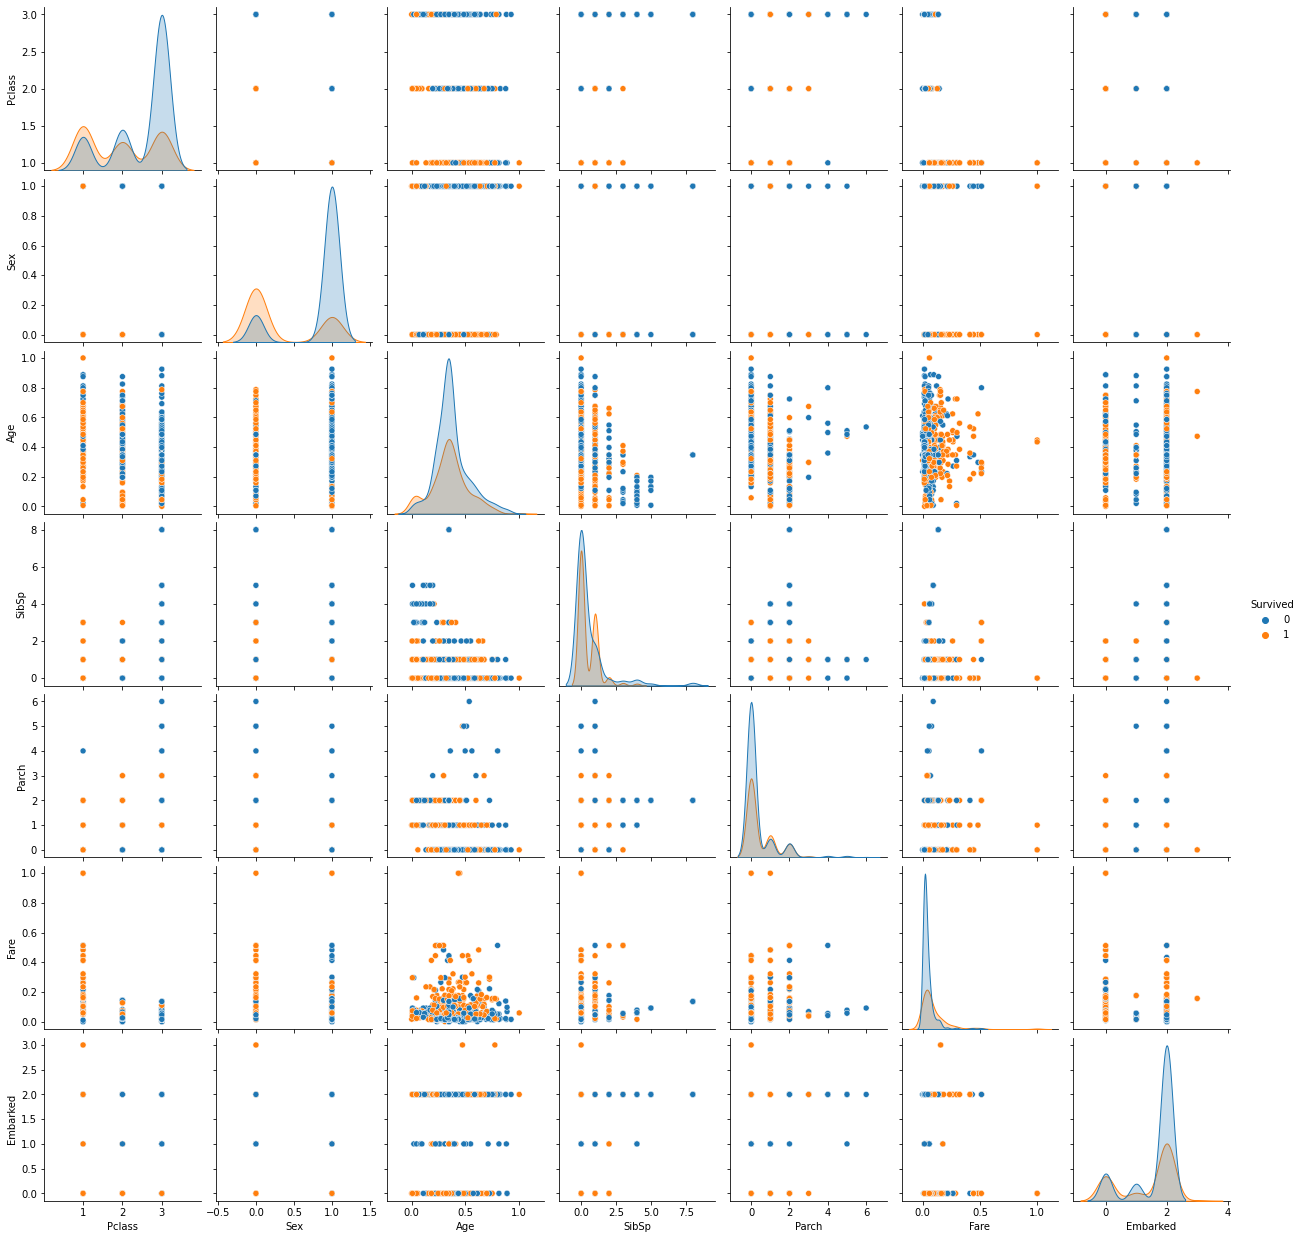

In [17]:
#historgam and scatter plot
import seaborn as sns
sns.pairplot(train.iloc[:, :],hue= 'Survived')

If fare is high then survive Chances is less and if low then chances is high From the above scatter plot we note the following:
If Fare is high then chances of survival is less and if low then chances are high
For survival rate is high for elderly people and children.

<AxesSubplot:xlabel='Survived', ylabel='count'>

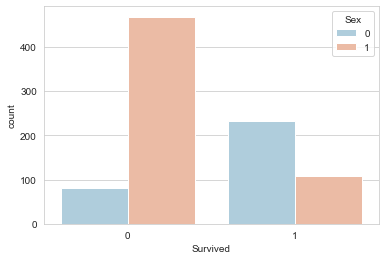

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:>

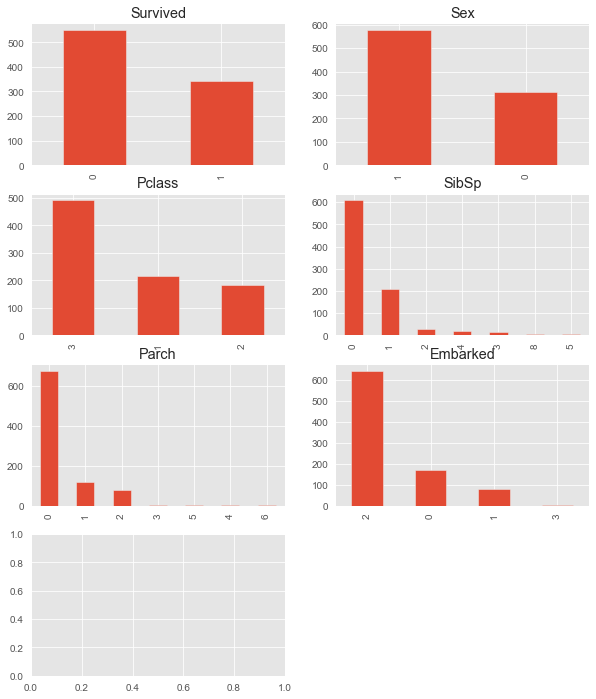

In [19]:
plt.style.use('ggplot')
plt.figure(figsize=(10,12))
plt.subplot(4,2,1)
train['Survived'].value_counts().plot(kind='bar',title='Survived')
plt.subplot(4,2,2)
train['Sex'].value_counts().plot(kind='bar',title='Sex')
plt.subplot(4,2,3)
train['Pclass'].value_counts().plot(kind='bar',title='Pclass')
plt.subplot(4,2,4)
train['SibSp'].value_counts().plot(kind='bar',title='SibSp')
plt.subplot(4,2,5)
train['Parch'].value_counts().plot(kind='bar',title='Parch')
plt.subplot(4,2,6)
train['Embarked'].value_counts().plot(kind='bar',title='Embarked')
plt.subplot(4,2,7)

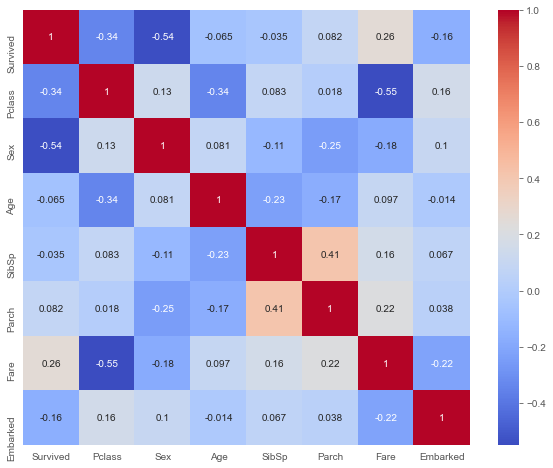

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm')
plt.show()

In [21]:
import sweetviz as sv
from pandas_profiling import ProfileReport

In [22]:
my_report = sv.analyze([train, "Train"],target_feat='Survived')
my_report.show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [23]:
profile = ProfileReport(train, title='Pandas Profiling Report', html={'style':{'full_width':False}})


profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data Preparation

In [24]:
# Splitting the data into train and test data 
X= train.iloc[:,1:8]

Y= train.iloc[:,0]
ns.random.seed(7)
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(X,Y, test_size = 0.15,random_state = 777) # 25% test data


print(y_train.value_counts())
print(y_test.value_counts())

0    460
1    297
Name: Survived, dtype: int64
0    89
1    45
Name: Survived, dtype: int64


ML models

In [25]:


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

Logistic Regression

In [26]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

log_acc=accuracy_score(y_test,log_reg.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,log_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,log_reg.predict(x_test))*100))

Train Set Accuracy:79.39233817701454
Test Set Accuracy:82.08955223880598


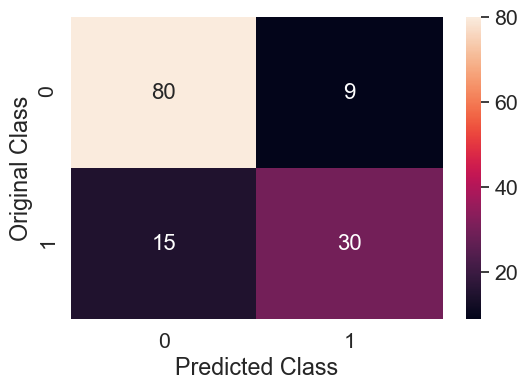

In [27]:
plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, log_reg.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

Decision Tree

In [28]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)

d_acc=accuracy_score(y_test,d_tree.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,d_tree.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,d_tree.predict(x_test))*100))

Train Set Accuracy:97.88639365918098
Test Set Accuracy:74.6268656716418


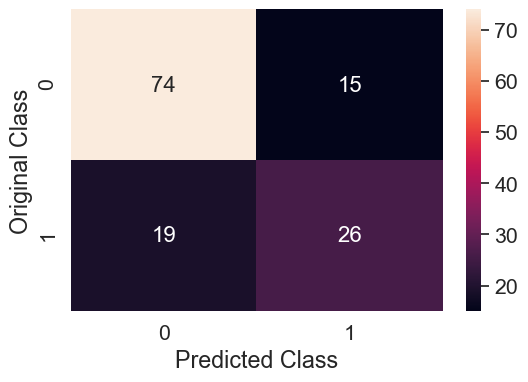

In [29]:
plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, d_tree.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

Random Forest

In [30]:
r_for = RandomForestClassifier()
r_for.fit(x_train,y_train)

r_acc=accuracy_score(y_test,r_for.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,r_for.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,r_for.predict(x_test))*100))

Train Set Accuracy:97.88639365918098
Test Set Accuracy:79.1044776119403


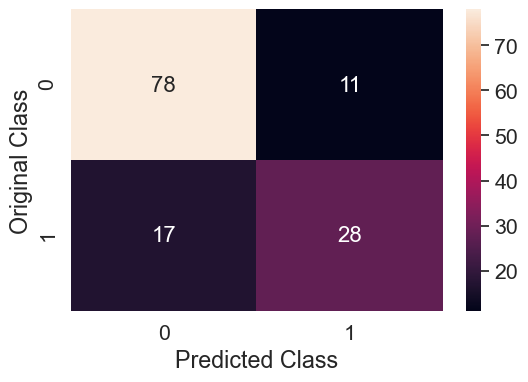

In [31]:
plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, r_for.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

K-NN

In [32]:
k_nei = KNeighborsClassifier()
k_nei.fit(x_train,y_train)

k_acc = accuracy_score(y_test,k_nei.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,k_nei.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,k_nei.predict(x_test))*100))

Train set Accuracy:85.20475561426684
Test Set Accuracy:79.1044776119403


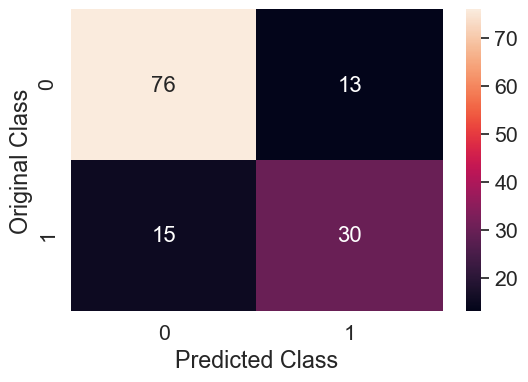

In [33]:
plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, k_nei.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

SVC

In [34]:
s_vec = SVC()
s_vec.fit(x_train,y_train)

s_acc = accuracy_score(y_test,s_vec.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,s_vec.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,s_vec.predict(x_test))*100))


Train set Accuracy:81.63804491413474
Test Set Accuracy:81.34328358208955


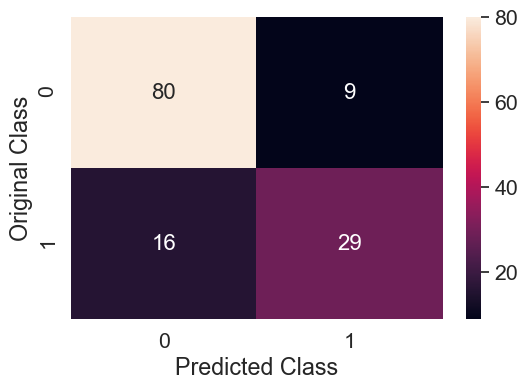

In [35]:
plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, s_vec.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

GB

In [36]:
g_clf = GaussianNB()
g_clf.fit(x_train,y_train)

g_acc = accuracy_score(y_test,g_clf.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,g_clf.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,g_clf.predict(x_test))*100))

Train set Accuracy:78.86393659180978
Test Set Accuracy:80.59701492537313


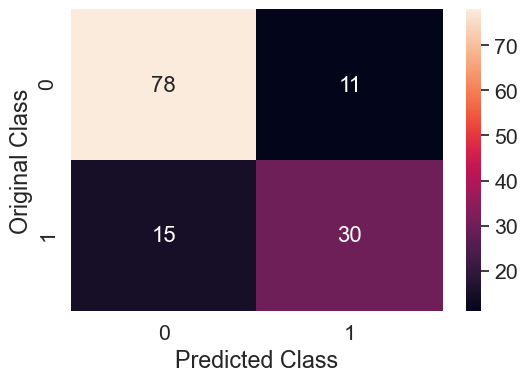

In [37]:
plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, g_clf.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()